In [54]:
%run My_function.ipynb

In [2]:
print ("Librairies utilisées :")
print ("Pandas :", pd.__version__)
print ("Numpy :", np.__version__)
print ("Seaborn :", sns.__version__)

Librairies utilisées :
Pandas : 1.4.4
Numpy : 1.21.5
Seaborn : 0.11.2


# Introduction

<div class="oc-richContent root-0-2-1" data-videotitle="video" data-current-user-id="328418" data-project-id="862" data-codio-button-label="Accéder au code"><p>&nbsp;</p>

<p style="text-align:center;">Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Elle souhaite se développer à l'international.</p>
<p><img src="https://user.oc-static.com/upload/2020/11/24/16062164030098_image2.png" alt=""></p>
<p>&nbsp;</p>
<p>L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !</p>
<p>Votre manager, Patrick, vous briefe par un e-mail :</p><br/>
<div class="oc-tableContainer"><table>
<tbody>
<tr>
<td style="text-align:left;"><strong>De</strong> : Patrick<br><strong>À </strong>: Moi<br><strong>Objet</strong> : Lancement mission data international</td>
</tr>
<tr>
<td style="font-size:13px;">
<p>Salut !</p>
<p>Comme on en a déjà brièvement parlé, je te fais ce mail pour te briefer sur la mission d’analyse pour le lancement à l’international.</p>
<p>Ton objectif sera de proposer une première analyse des groupements de pays que l’on peut cibler pour exporter nos poulets. Nous approfondirons ensuite l'étude de marché.&nbsp;</p>
<p>Tu seras en totale autonomie sur ce projet, notamment sur le choix des données à analyser et même du langage à utiliser (R ou Python).&nbsp;</p>
<p>Pars des données de la FAO <em>(Food and Agriculture Organization)</em> que je te mets en pièce jointe pour faire ton analyse. Si tu veux aller plus loin, notamment avec les critères de l’analyse PESTEL, tu peux récupérer et utiliser toutes les données en <em>open data</em> que tu souhaites sur <a href="http://www.fao.org/faostat/fr/#data/">le site de la FAO</a>.</p>
<p>Pour la partie analyse, dans un premier temps j’aimerais que tu testes la classification ascendante hiérarchique, avec un dendrogramme comme visualisation. Ensuite tu pourras utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering. N'hésite pas à prendre le temps d’analyser les centroïdes de tes classes. Tu peux également réaliser une ACP afin de visualiser les résultats de ton analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus...</p>
<p>Voici ce que j’attends de toi :</p>
<ul style="text-align:left;">
<li>un notebook ou fichier R contenant la préparation, le nettoyage et l’analyse exploratoire des données ;</li>
<li>un notebook ou fichier R contenant le/les clusterings effectués, et les différentes visualisations associées ;</li>
<li>une présentation qui récapitule les points suivants :&nbsp;</li>
<ul>
<li>le contexte du projet de data analyse ;</li>
<li>votre démarche (sans entrer dans les détails mathématiques, mais en vulgarisant les sujets abordés) ;</li>
<li>vos résultats et recommandations.</li>
</ul>
</ul>
<p>&nbsp;</p>
<p>Bon courage !</p>
<p>Patrick</p>
</td>
</tr>
<tr>
<td style="text-align:left;">
<p>Pièce jointe :</p>
<ul>
<li><a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P9-data.zip">Données New Food Balances (FAO)</a></li>
</ul>
</td>
</tr>
</tbody>
</table></div>
<p>&nbsp;</p>
<p>&nbsp;Vous avez toutes les cartes en main. À vous de jouer !</p>

<p><img src="https://user.oc-static.com/upload/2023/03/15/16788716972812_Banner-Livrables.png" alt="Bannière livrables"></p>

<ol>
<li>un notebook ou fichier R contenant la préparation, le nettoyage et l’analyse exploratoire des données.</li>
<li>un notebook ou fichier R contenant le/les clusterings effectués, et les différentes visualisations associées.</li>
<li>une présentation du travail réalisé (Powerpoint ou équivalent, maximum 20 slides).</li>
</ol>

</div>

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, decomposition


from sklearn.cluster import KMeans


from scipy.cluster.hierarchy import dendrogram, linkage


In [4]:
df = pd.read_csv("Données/DisponibiliteAlimentaire_2017.csv")
population = pd.read_csv("Données/Population_2000_2018.csv")

In [5]:
df.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [6]:
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [7]:
df['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [8]:
volaille = df.loc[df["Produit"]=="Viande de Volailles"]
volaille

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.00,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.00,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.00,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176396,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2734,Viande de Volailles,2017,2017,Milliers de tonnes,67.00,S,Données standardisées
176397,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,2017,kg,4.68,Fc,Donnée calculée
176398,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,2017,Kcal/personne/jour,16.00,Fc,Donnée calculée
176399,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,1.59,Fc,Donnée calculée


In [9]:
volaille = volaille[["Produit","Zone","Élément","Année","Valeur"]]
volaille

,Produit,Zone,Élément,Année,Valeur
651,Viande de Volailles,Afghanistan,Production,2017,28.00
652,Viande de Volailles,Afghanistan,Importations - Quantité,2017,29.00
653,Viande de Volailles,Afghanistan,Variation de stock,2017,0.00
654,Viande de Volailles,Afghanistan,Disponibilité intérieure,2017,57.00
655,Viande de Volailles,Afghanistan,Pertes,2017,2.00
...,...,...,...,...,...
176396,Viande de Volailles,Zimbabwe,Nourriture,2017,67.00
176397,Viande de Volailles,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,2017,4.68
176398,Viande de Volailles,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),2017,16.00
176399,Viande de Volailles,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,2017,1.59


In [10]:
volaille = volaille.pivot(index="Zone",columns="Élément", values="Valeur")
volaille

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,-0.0
Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,NaN,48.0,-0.0,NaN,NaN,-26.0
Équateur,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,NaN,-1.0
États-Unis d'Amérique,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,NaN,21914.0,-0.0,NaN,77.0,80.0


In [11]:
volaille = volaille.drop(["Alimentation pour touristes",
                          "Aliments pour animaux",
                          "Autres utilisations (non alimentaire)",
                          "Disponibilité alimentaire (Kcal/personne/jour)",
                          "Disponibilité alimentaire en quantité (kg/personne/an)",
                          "Disponibilité de matière grasse en quantité (g/personne/jour)",
                          "Disponibilité de protéines en quantité (g/personne/jour)"], axis=1)

In [12]:
volaille.head()

Élément,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,
Afghanistan,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
Afrique du Sud,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,-0.0
Albanie,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
Algérie,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
Allemagne,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0


In [13]:
volaille.shape

(172, 10)

In [14]:
#Population
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [15]:
population = population.loc[population["Année"]==2017]
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres,NaN
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres,NaN


Affichage en % des valeurs manquantes par colonnes


,0,Nb Valeurs Manquantes
Code Domaine,0.00,0
Domaine,0.00,0
Code zone,0.00,0
Zone,0.00,0
Code Élément,0.00,0
Élément,0.00,0
Code Produit,0.00,0
Produit,0.00,0
Code année,0.00,0
Année,0.00,0


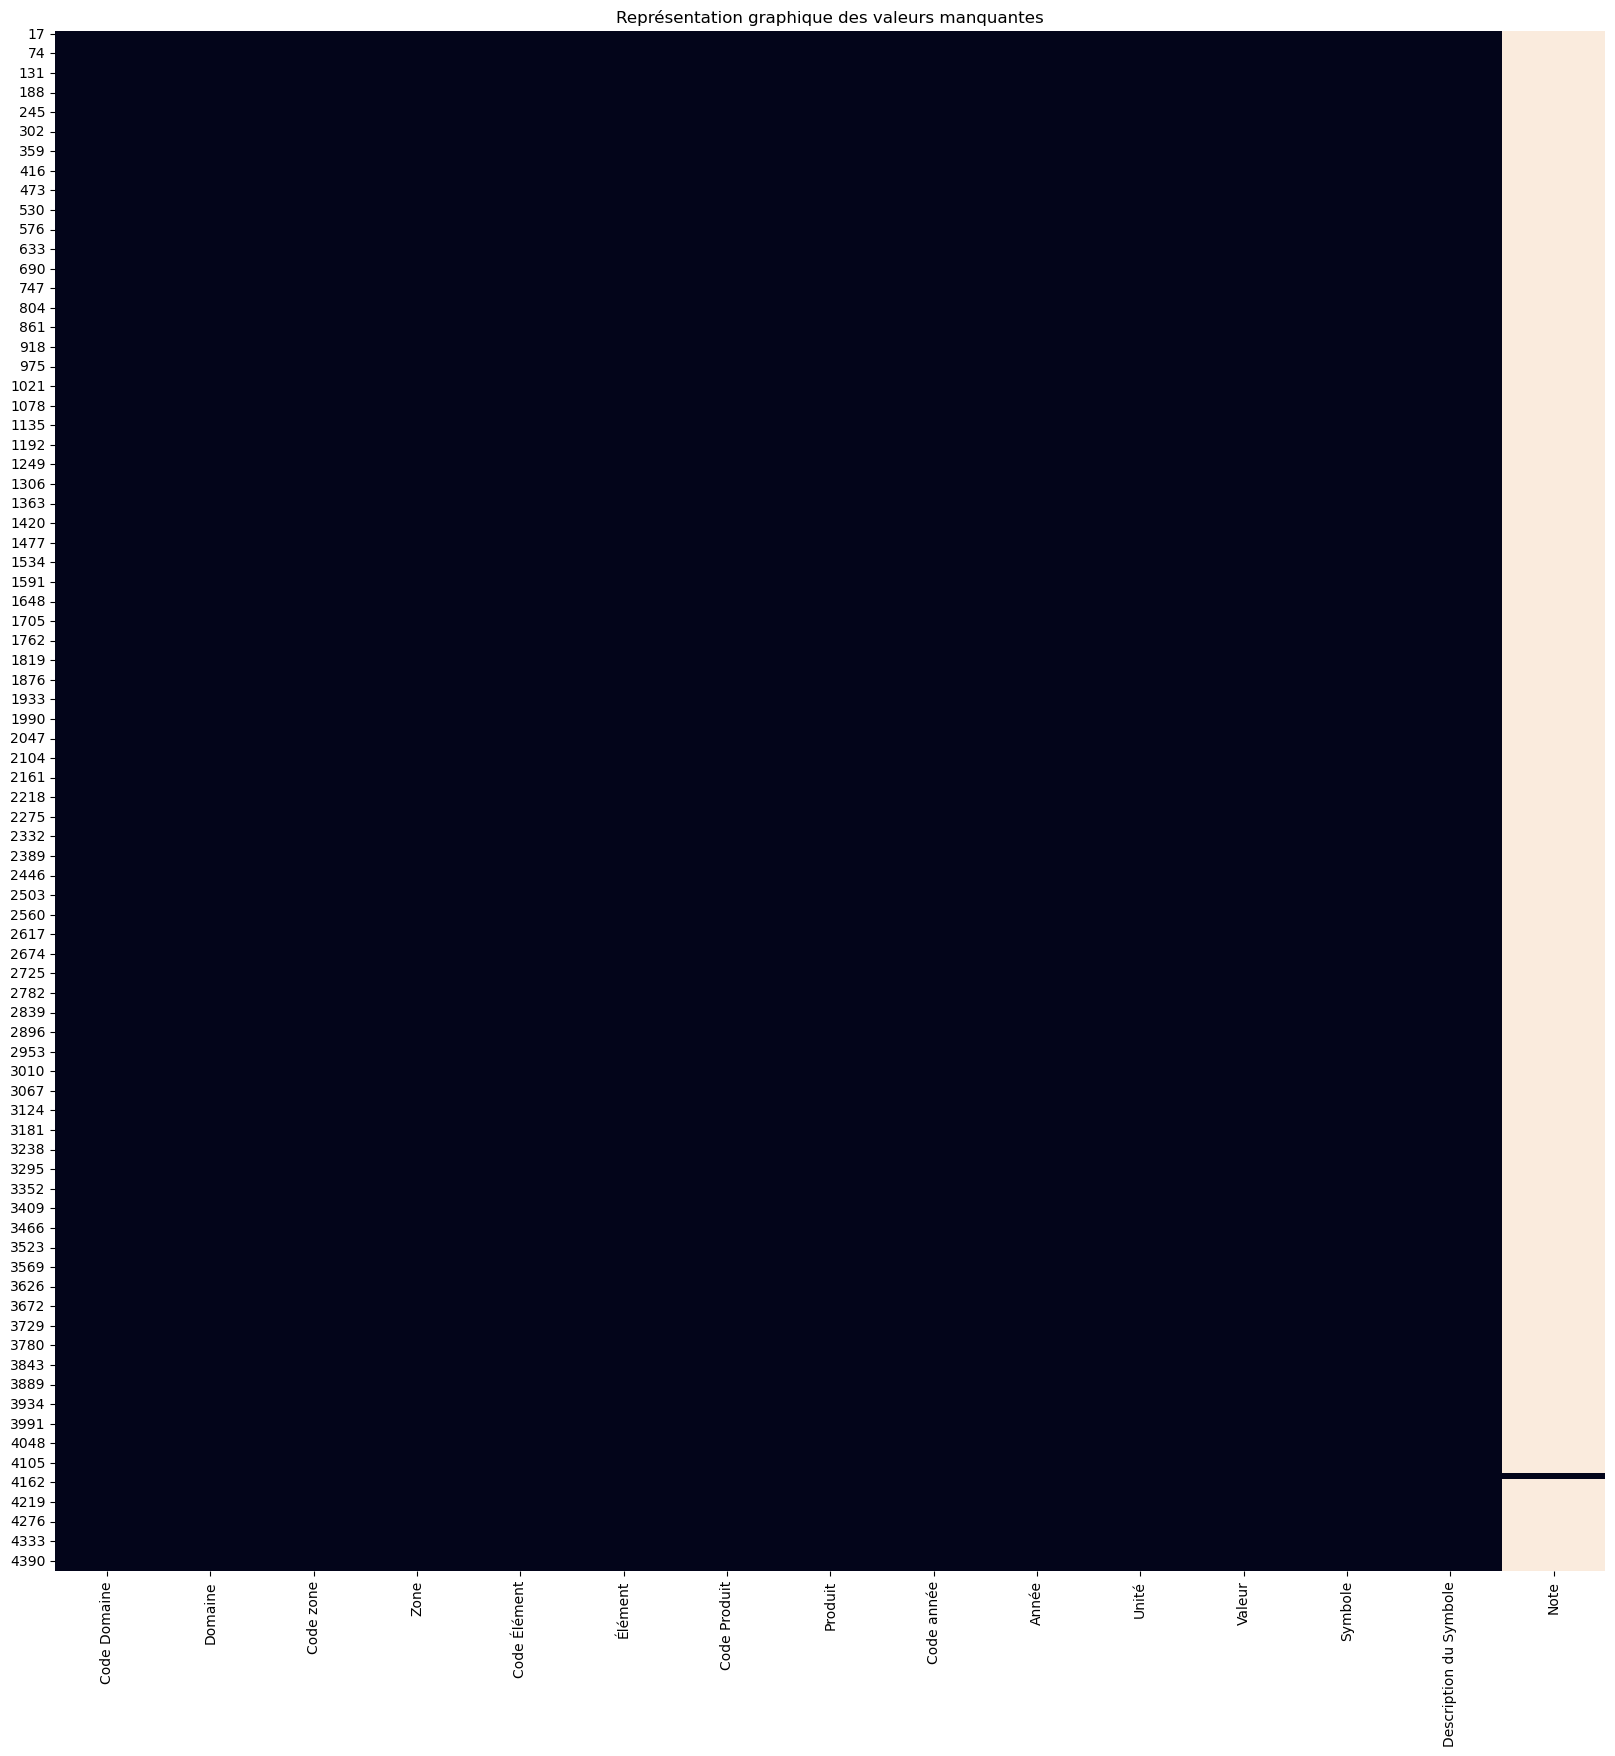

In [16]:
my_valeurs_manquantes(population)

In [17]:
# Vérification des doublons
population["Zone"].duplicated().sum()
print("Il n'y a pas de doublons de pays")

Il n'y a pas de doublons de pays


In [18]:
# Calcul de la population mondiale pour l'année 2017
pop_monde_2017 = int(population["Valeur"].sum()*1000)
print("La population Mondiale en 2017 était de", pop_monde_2017,"habitants")

La population Mondiale en 2017 était de 7548134111 habitants


# Nettoyage des données

## Nettoyage de la base Volaille

Affichage en % des valeurs manquantes par colonnes


,0,Nb Valeurs Manquantes
Élément,,
Disponibilité intérieure,1.16,2
Importations - Quantité,1.16,2
Nourriture,1.16,2
Variation de stock,1.74,3
Production,2.33,4
Résidus,4.65,8
Exportations - Quantité,21.51,37
Pertes,61.05,105
Traitement,73.26,126


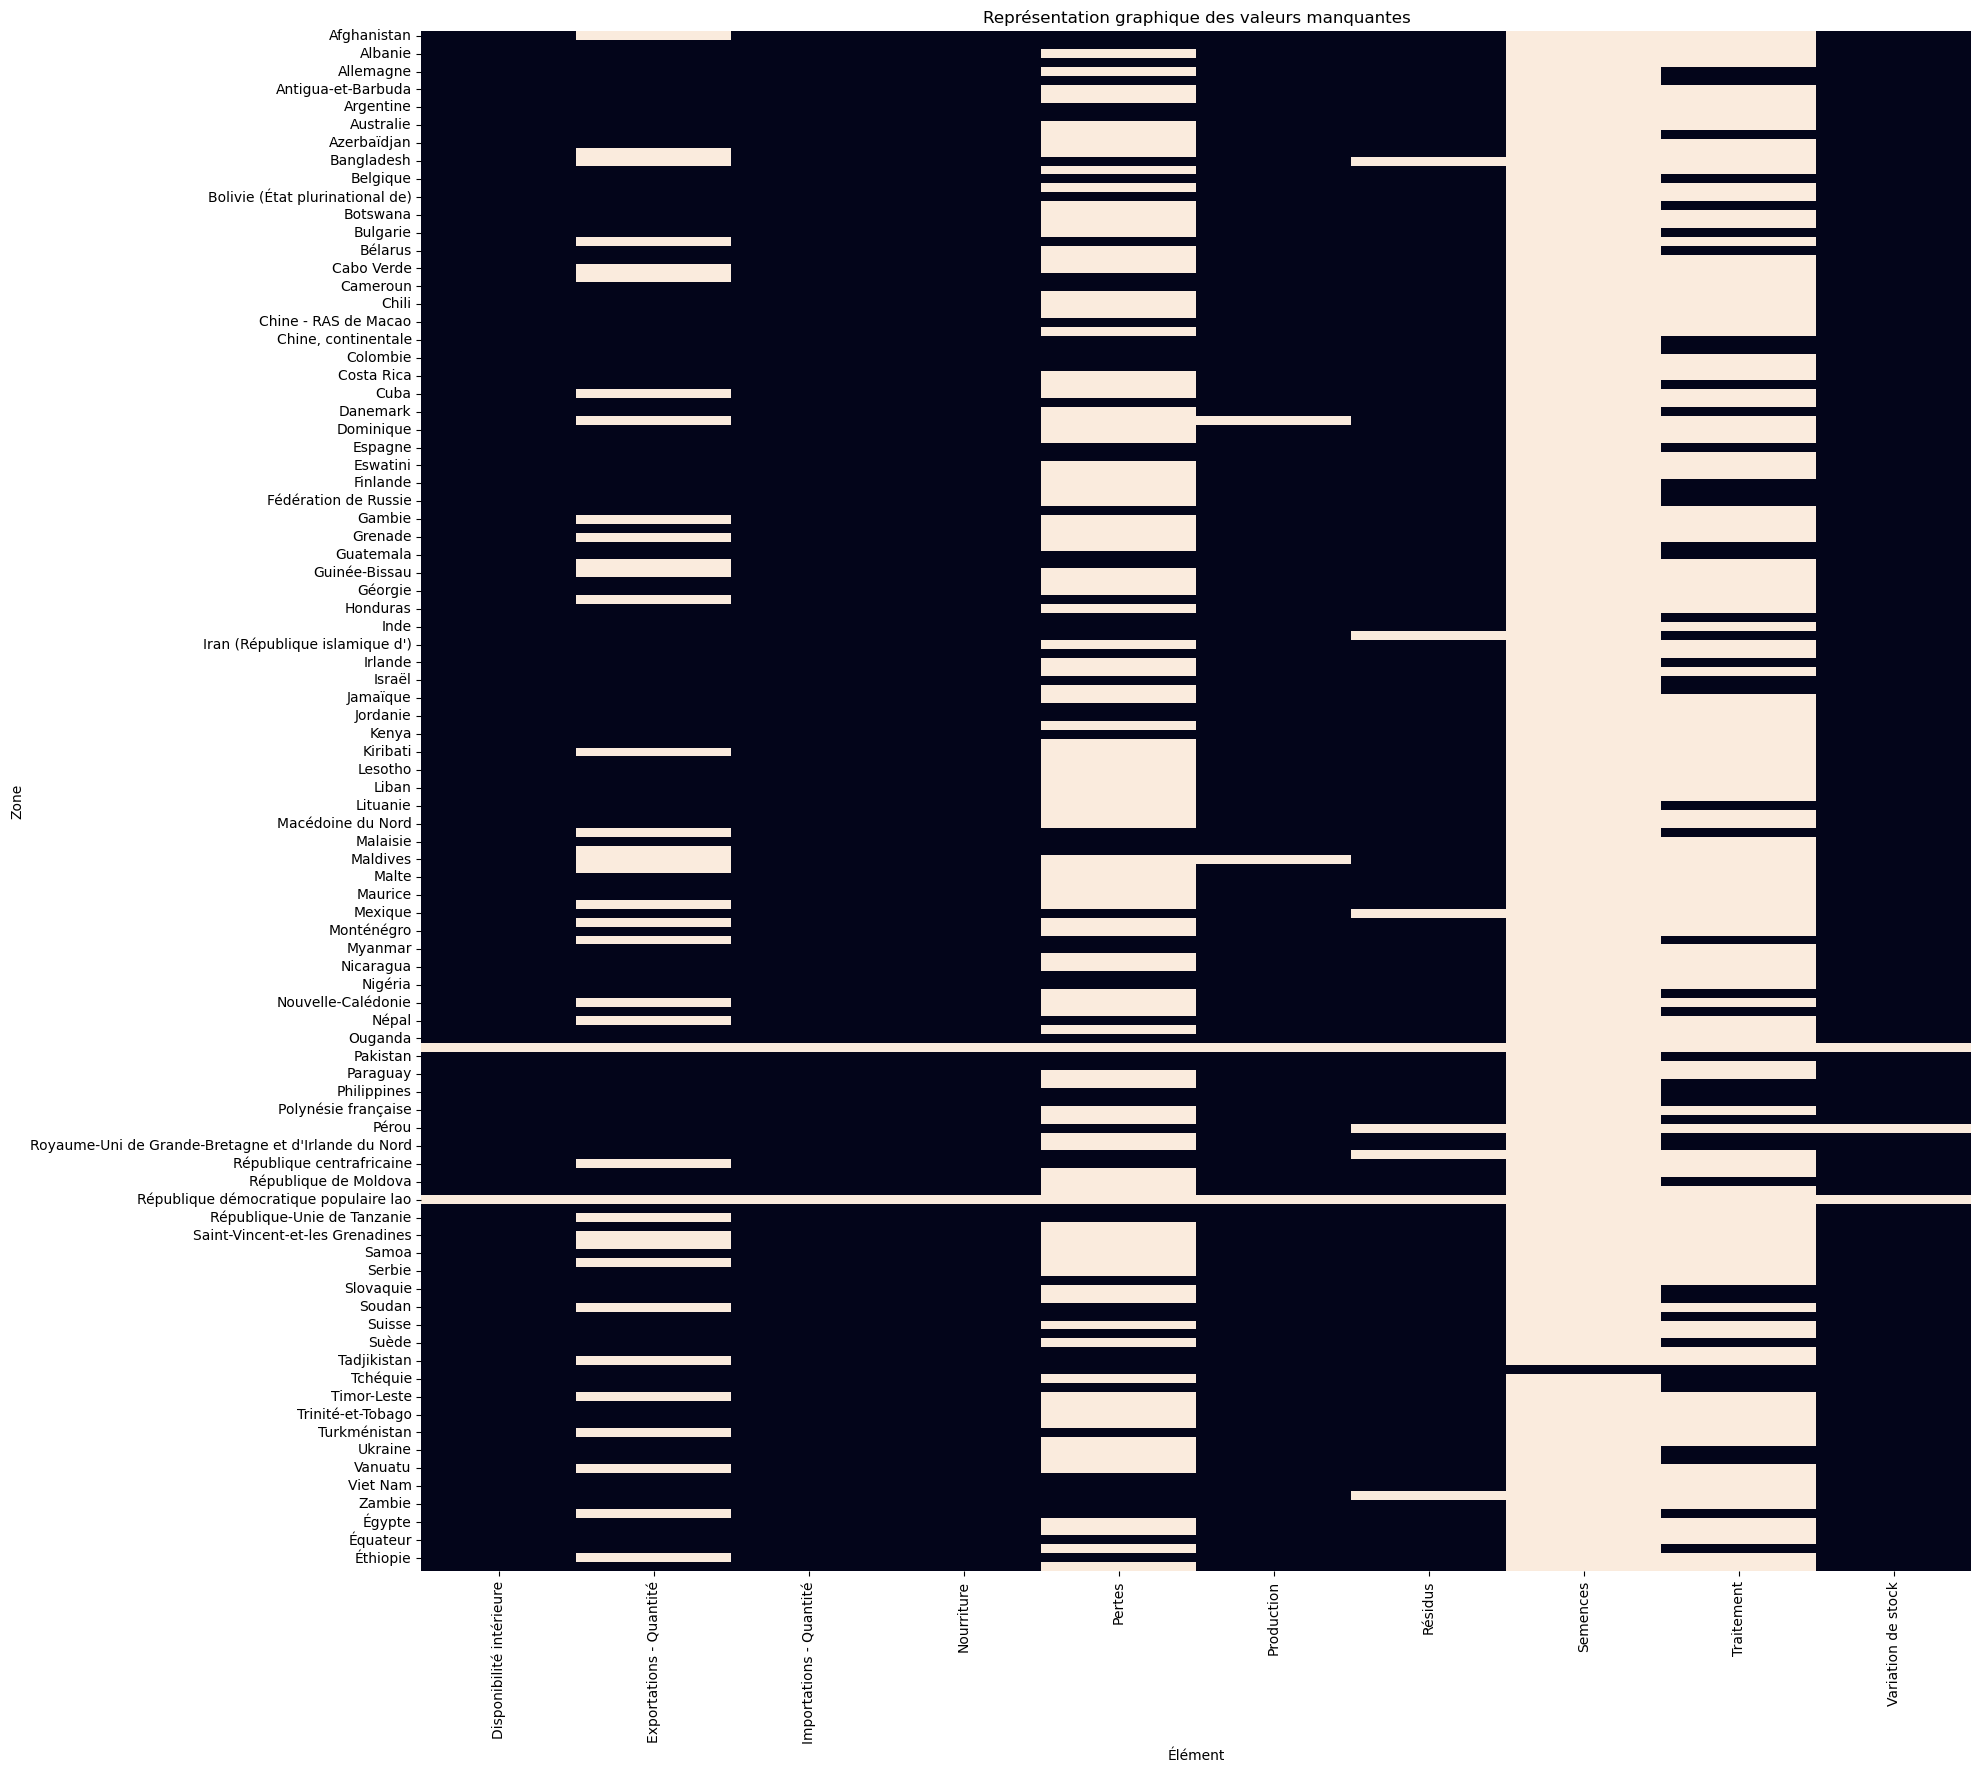

In [19]:
my_valeurs_manquantes(volaille)

In [20]:
#Vérification du nombre de valeurs null
volaille.isna().sum()

Élément
Disponibilité intérieure      2
Exportations - Quantité      37
Importations - Quantité       2
Nourriture                    2
Pertes                      105
Production                    4
Résidus                       8
Semences                    171
Traitement                  126
Variation de stock            3
dtype: int64

In [21]:
#Il y a beaucoup de valeurs manquantes dans les variables "Pertes", "Semenses" et "Résidus". Je décide donc de supprimer les variables
volaille = volaille.drop(["Semences","Traitement"], axis=1)

In [22]:
volaille = volaille.drop(["Ouzbékistan","République démocratique populaire lao"], axis=0)

In [23]:
#volaille = volaille.drop(["Brésil","États-Unis d'Amérique","Chine, continentale"], axis=0)

In [24]:
volaille

Élément,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Variation de stock
Zone,,,,,,,,
Afghanistan,57.0,NaN,29.0,55.0,2.0,28.0,0.0,0.0
Afrique du Sud,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,-0.0
Albanie,47.0,0.0,38.0,47.0,NaN,13.0,0.0,4.0
Algérie,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.0
Allemagne,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,-29.0
...,...,...,...,...,...,...,...,...
Émirats arabes unis,412.0,94.0,433.0,412.0,NaN,48.0,-0.0,-26.0
Équateur,341.0,0.0,0.0,324.0,17.0,340.0,0.0,-1.0
États-Unis d'Amérique,18266.0,3692.0,123.0,18100.0,NaN,21914.0,-0.0,80.0


In [25]:
#On créé un mask pour modifier seulemnt les valeurs null dans pertes
mask = volaille["Pertes"].isna()
volaille.loc[mask,'Pertes']=0

In [26]:
volaille.shape

(170, 8)

In [27]:
#Vérification du nombre de valeurs null
volaille.isna().sum()

Élément
Disponibilité intérieure     0
Exportations - Quantité     35
Importations - Quantité      0
Nourriture                   0
Pertes                       0
Production                   2
Résidus                      6
Variation de stock           1
dtype: int64

In [28]:
#On créé un mask pour modifier seulemnt les valeurs null dans Production
mask = volaille["Production"].isna()
volaille.loc[mask,'Production']=0

In [29]:
#On créé un mask pour modifier seulemnt les valeurs null dans Résidus
mask = volaille["Résidus"].isna()
volaille.loc[mask,'Résidus']=0

In [30]:
#On créé un mask pour modifier seulemnt les valeurs null dans Variation de Stock
mask = volaille["Variation de stock"].isna()
volaille.loc[mask,'Variation de stock']=0

In [31]:
#On créé un mask pour modifier seulemnt les valeurs null dans Exportations - Quantité
mask = volaille["Exportations - Quantité"].isna()
volaille.loc[mask,'Exportations - Quantité']=0

In [32]:
volaille.shape

(170, 8)

In [33]:
df = volaille

## Nettoyage de la base Population

In [34]:
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres,NaN
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres,NaN


In [35]:
# Suppression des colonnes qui ne nous interesse pas. Dans notre cas, on va seulement créer une nouvelle table 
# avec les valeurs selectionnées

population_2017 = population[["Zone","Valeur"]]
population_2017.rename(columns={"Valeur":"Population 2017 (en milliers)"}, inplace=True)
population_2017.head()

/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_7759/1087623966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_2017.rename(columns={"Valeur":"Population 2017 (en milliers)"}, inplace=True)


,Zone,Population 2017 (en milliers)
17,Afghanistan,36296.113
36,Afrique du Sud,57009.756
55,Albanie,2884.169
74,Algérie,41389.189
93,Allemagne,82658.409


## Jointure des tables Population_2017 et Volaille 

In [36]:
df = pd.merge(volaille, population_2017, how="inner", on="Zone")
df = df.set_index("Zone")
df.head()

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Variation de stock,Population 2017 (en milliers)
Zone,,,,,,,,,
Afghanistan,57.0,0.0,29.0,55.0,2.0,28.0,0.0,0.0,36296.113
Afrique du Sud,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,-0.0,57009.756
Albanie,47.0,0.0,38.0,47.0,0.0,13.0,0.0,4.0,2884.169
Algérie,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.0,41389.189
Allemagne,1739.0,646.0,842.0,1609.0,0.0,1514.0,-38.0,-29.0,82658.409


# Analyse Univarié

In [37]:
df.describe(include="all")

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Variation de stock,Population 2017 (en milliers)
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02
mean,687.594118,104.970588,89.529412,657.047059,17.176471,716.658824,-2.735294,13.588235,4.311688e+04
std,2187.184747,460.628724,186.669983,2136.545796,78.466014,2487.847959,13.346783,75.148893,1.539395e+05
min,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,-125.000000,-119.000000,5.204500e+01
25%,30.500000,0.000000,3.000000,28.500000,0.000000,13.000000,0.000000,0.000000,2.855103e+03
50%,100.000000,0.000000,16.000000,99.500000,0.000000,68.000000,0.000000,0.000000,9.757833e+03
75%,368.250000,12.000000,81.250000,365.250000,2.000000,384.250000,0.000000,7.000000,2.971320e+04
max,18266.000000,4223.000000,1069.000000,18100.000000,695.000000,21914.000000,0.000000,859.000000,1.421022e+06


<AxesSubplot:xlabel='Population 2017 (en milliers)', ylabel='Production'>

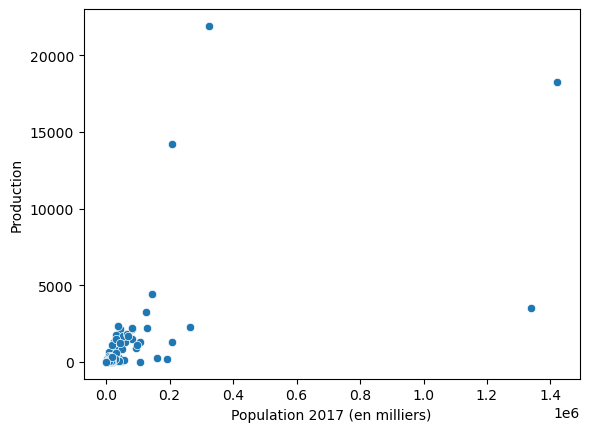

In [38]:
sns.scatterplot(data=df, x="Population 2017 (en milliers)", y="Production")

# Analyse Exploratoire

Dans cette première Analyse Exploratoire, nous allons travailler sur 9 Variables :
    - Disponibilité intérieure
    - Exportations - Quantité
    - Importations - Quantité
    - Nourriture
    - Pertes
    - Production
    - Résidus
    - Variation de stock
    - Population (en milliers)


## Analyse sans Scaling

heatmap des corrélation + heatmap + centroid + avant après scaler

In [39]:
df

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Variation de stock,Population 2017 (en milliers)
Zone,,,,,,,,,
Afghanistan,57.0,0.0,29.0,55.0,2.0,28.0,0.0,0.0,36296.113
Afrique du Sud,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,-0.0,57009.756
Albanie,47.0,0.0,38.0,47.0,0.0,13.0,0.0,4.0,2884.169
Algérie,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.0,41389.189
Allemagne,1739.0,646.0,842.0,1609.0,0.0,1514.0,-38.0,-29.0,82658.409
...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,412.0,94.0,433.0,412.0,0.0,48.0,-0.0,-26.0,9487.203
Équateur,341.0,0.0,0.0,324.0,17.0,340.0,0.0,-1.0,16785.361
États-Unis d'Amérique,18266.0,3692.0,123.0,18100.0,0.0,21914.0,-0.0,80.0,325084.756


In [40]:
%run My_function.ipynb

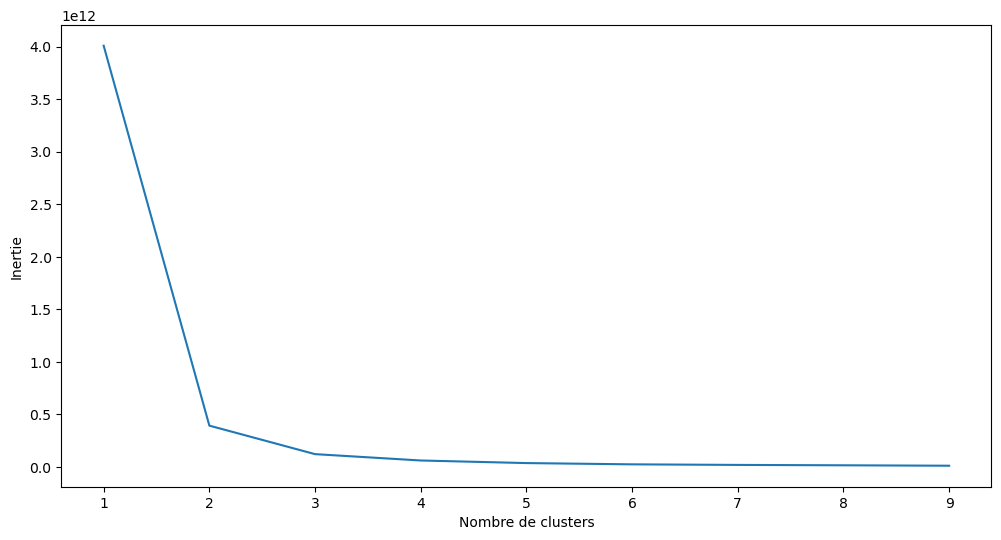

D'après la méthode du coude, le nombre de cluster optimal est : 2


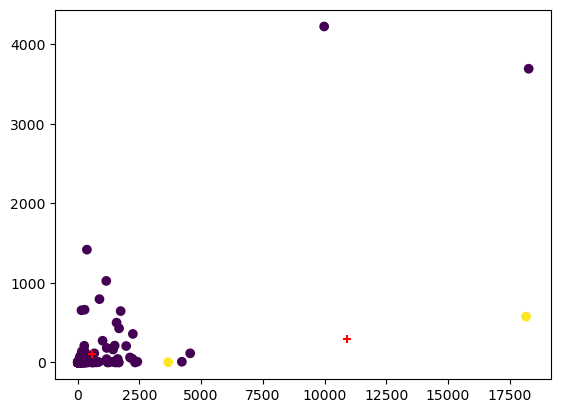

In [41]:
my_all_kmeans(df)

D'après la méthode du coude, le nombre de cluster optimal est : 2


2

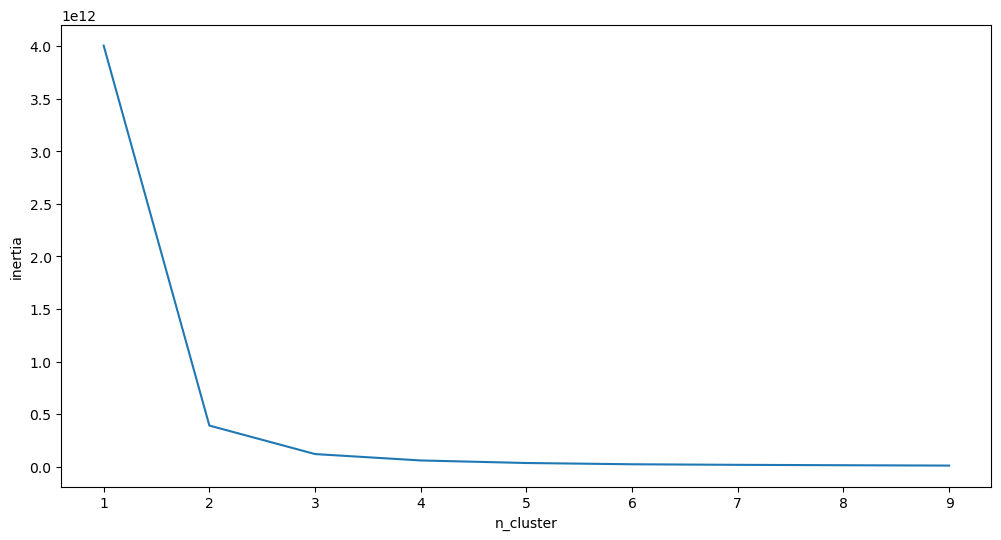

In [42]:
my_kmeans_coude(df)

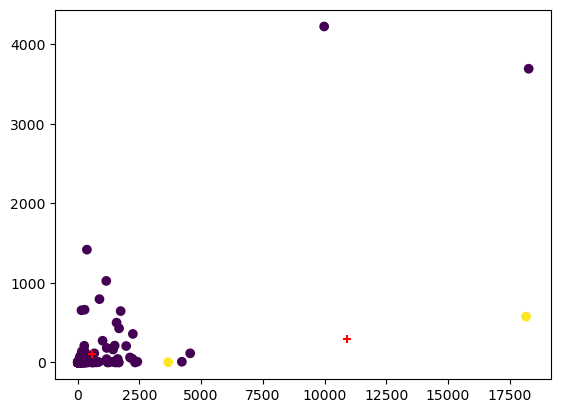

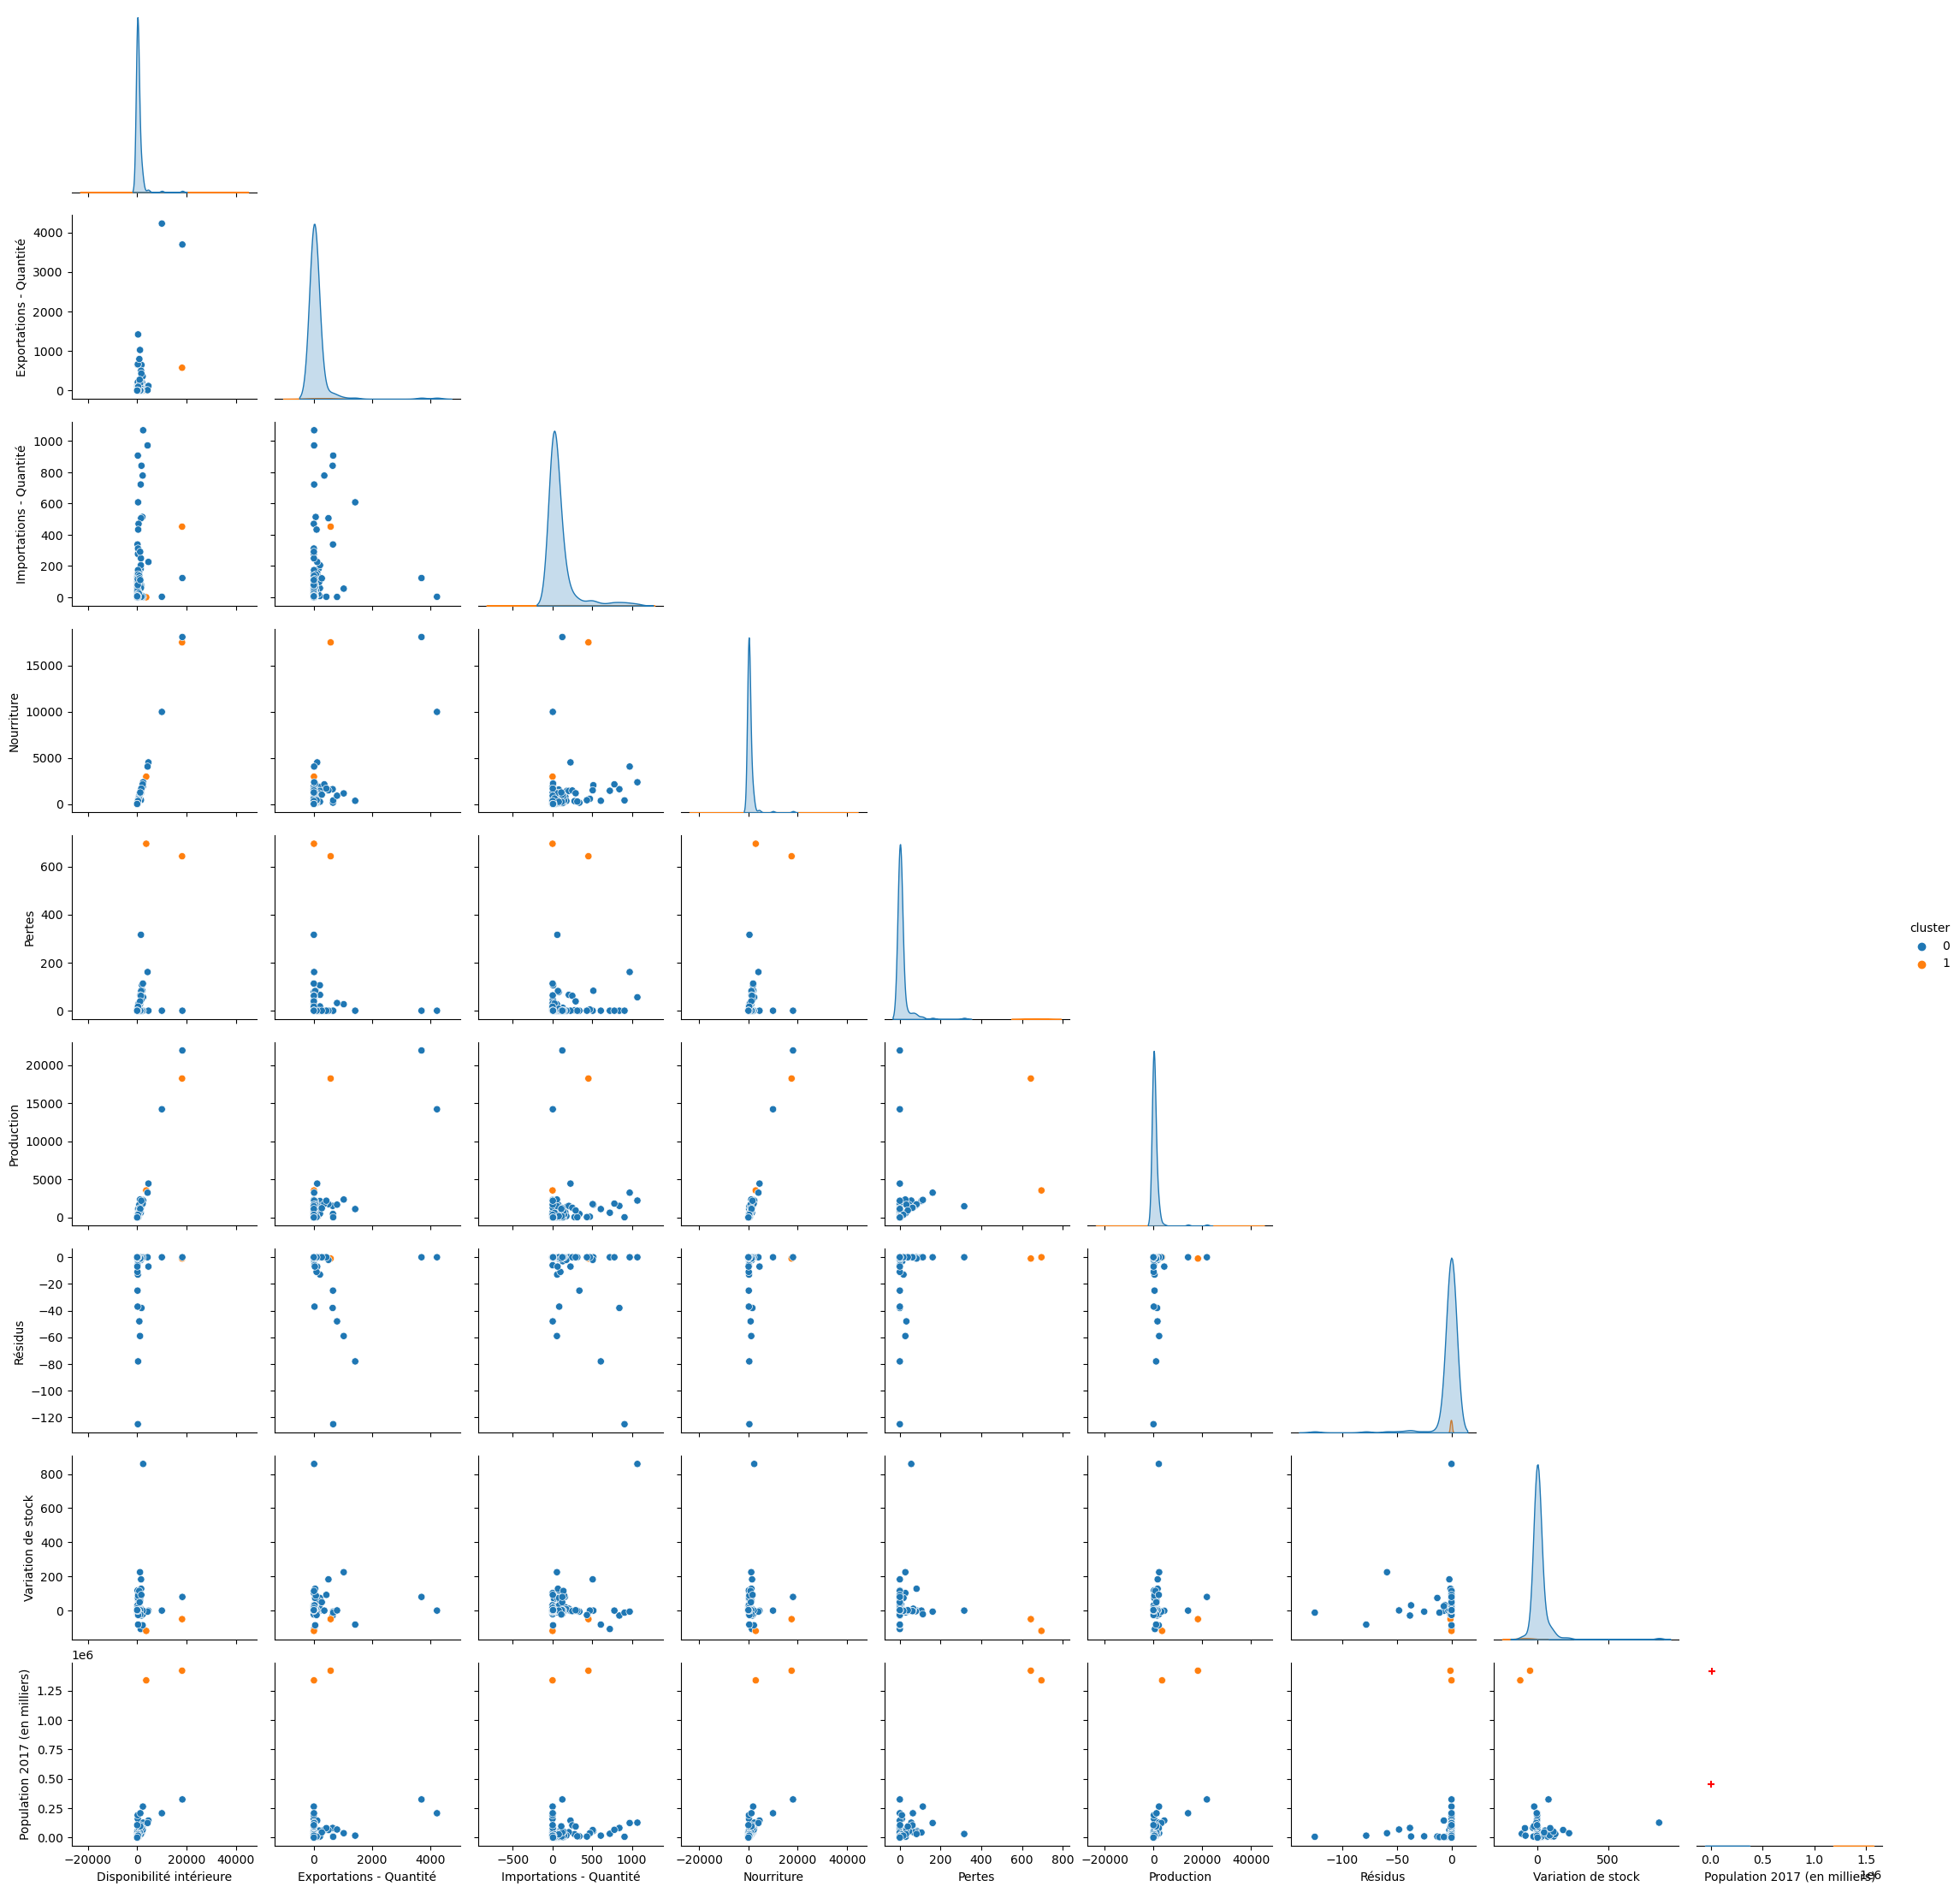

<Figure size 2500x2500 with 0 Axes>

In [43]:
my_kmeans(df, 2, True)

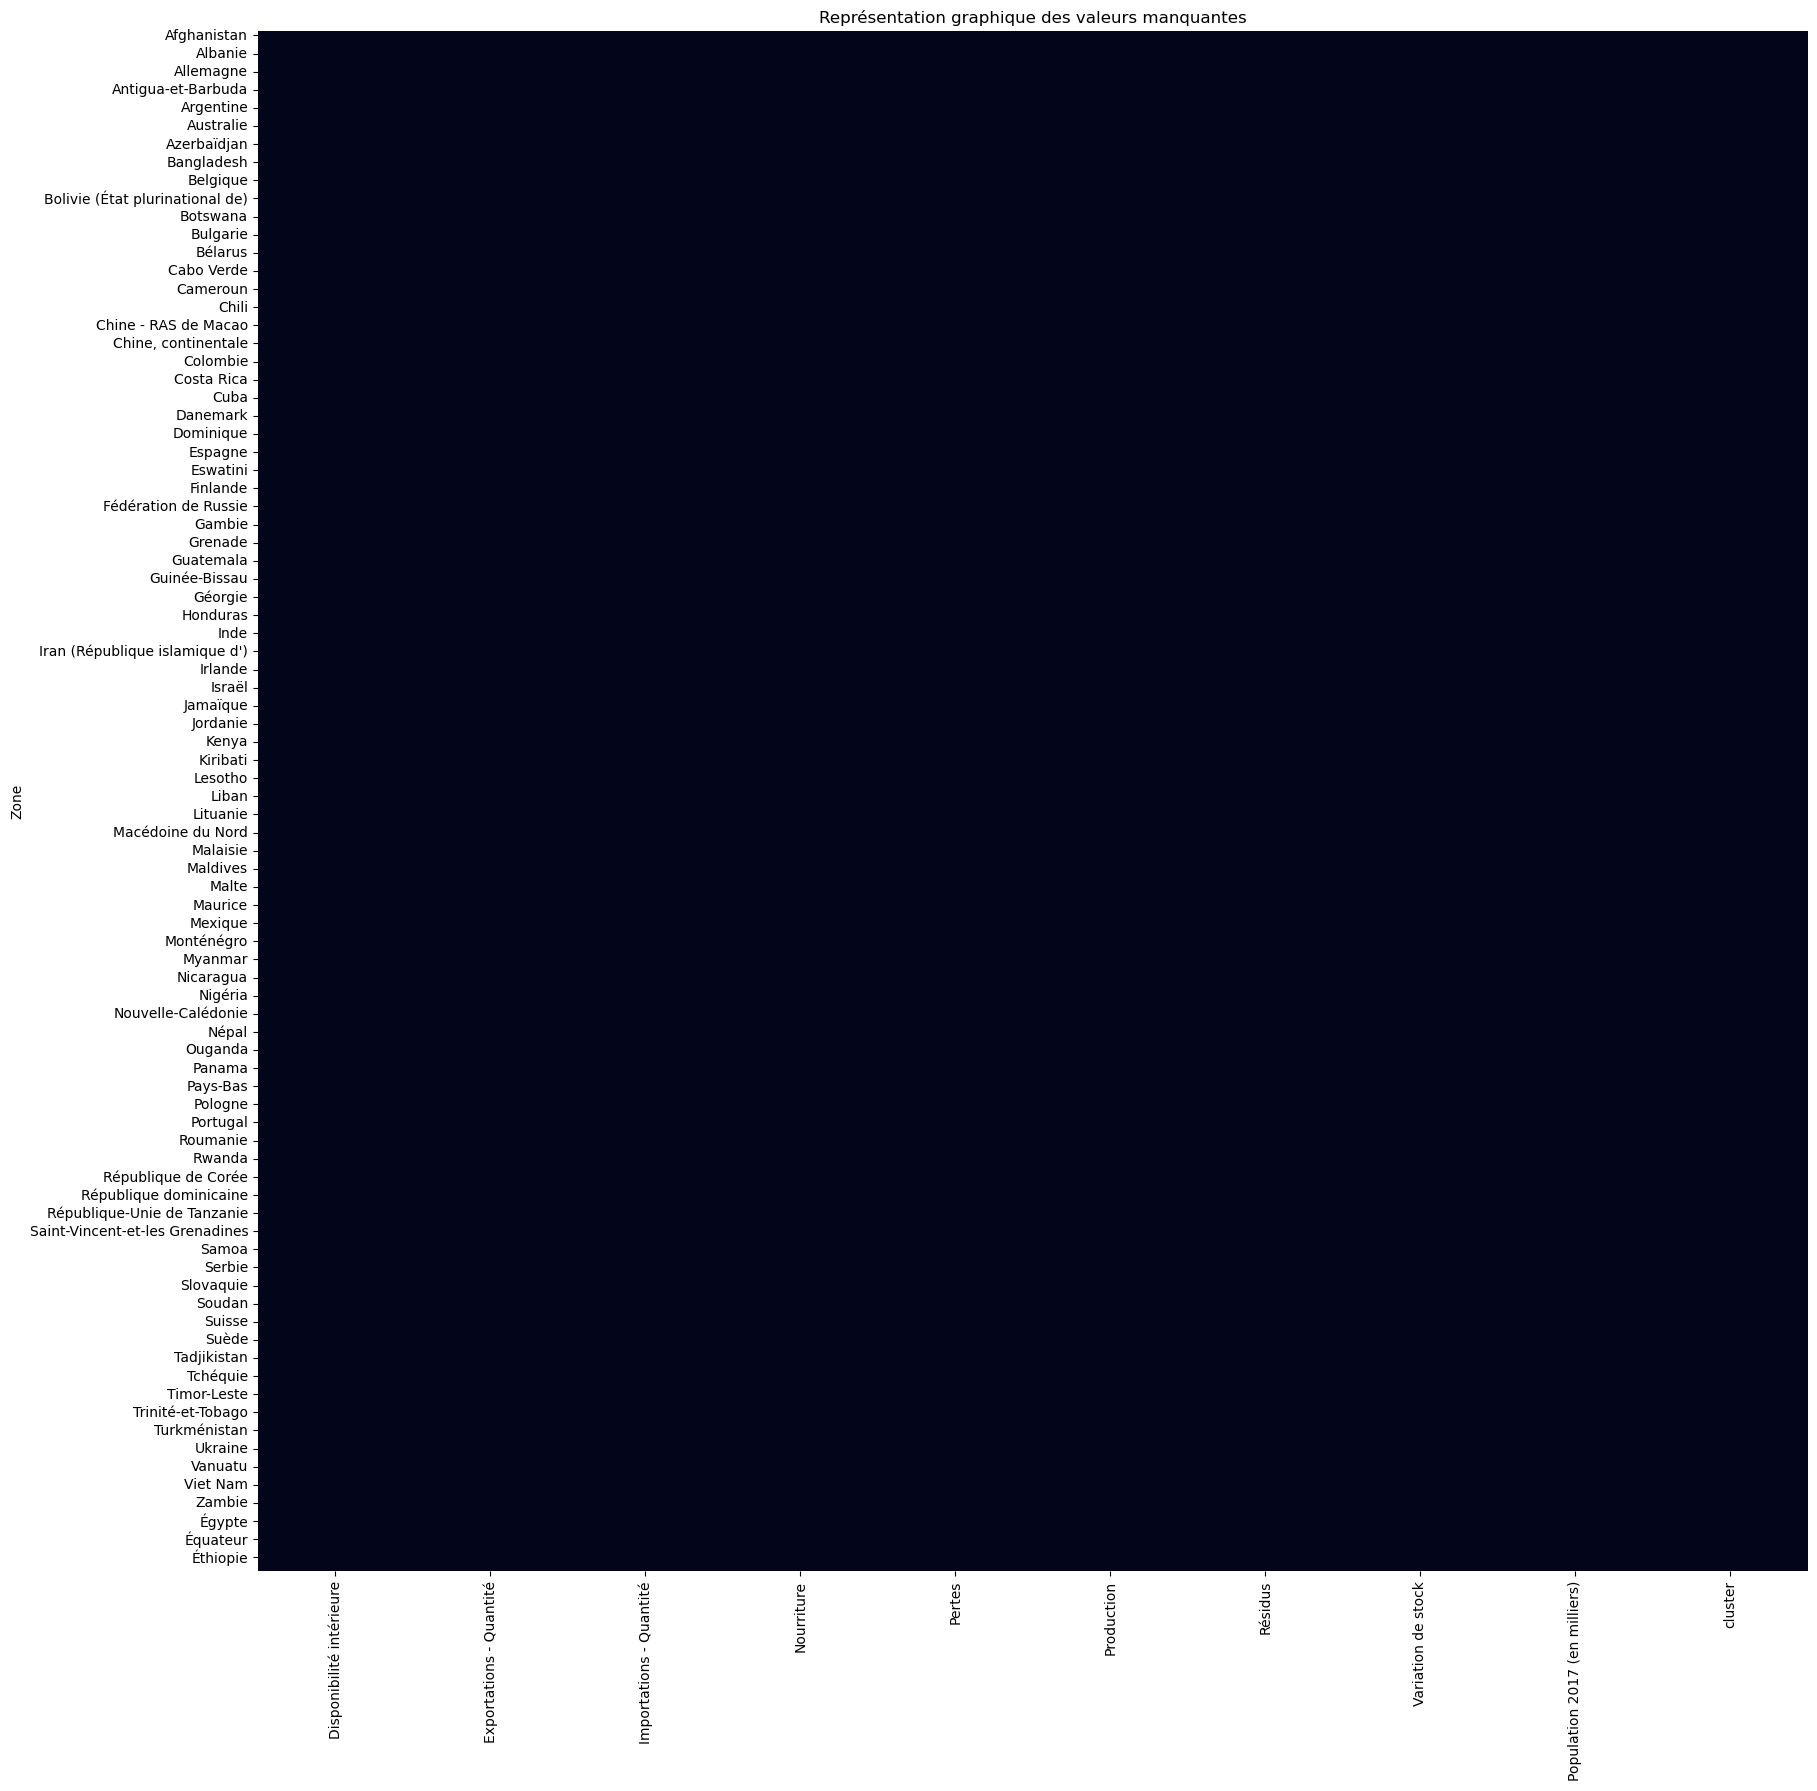

,observations,variables,moyennes,medianes,ecart_types,min,max,nb_valeurs_manquantes,%_valeurs_manquantes
Disponibilité intérieure,170,10,687.594118,100.000,2187.184747,2.000,18266.000,0,0.0
Exportations - Quantité,170,10,104.970588,0.000,460.628724,0.000,4223.000,0,0.0
Importations - Quantité,170,10,89.529412,16.000,186.669983,0.000,1069.000,0,0.0
Nourriture,170,10,657.047059,99.500,2136.545796,2.000,18100.000,0,0.0
Pertes,170,10,17.176471,0.000,78.466014,0.000,695.000,0,0.0
Production,170,10,716.658824,68.000,2487.847959,0.000,21914.000,0,0.0
Résidus,170,10,-2.735294,0.000,13.346783,-125.000,0.000,0,0.0
Variation de stock,170,10,13.588235,-0.000,75.148893,-119.000,859.000,0,0.0
Population 2017 (en milliers),170,10,43116.876371,9757.833,153939.476079,52.045,1421021.791,0,0.0
cluster,170,10,0.011765,0.000,0.108144,0.000,1.000,0,0.0


In [44]:
my_first_analyse(df)

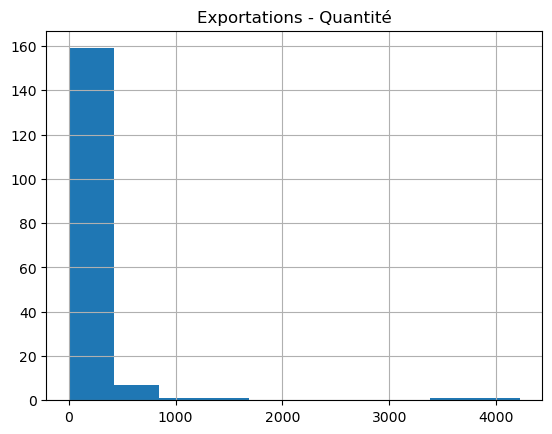

In [45]:
my_data_visualisation(df, "Exportations - Quantité")

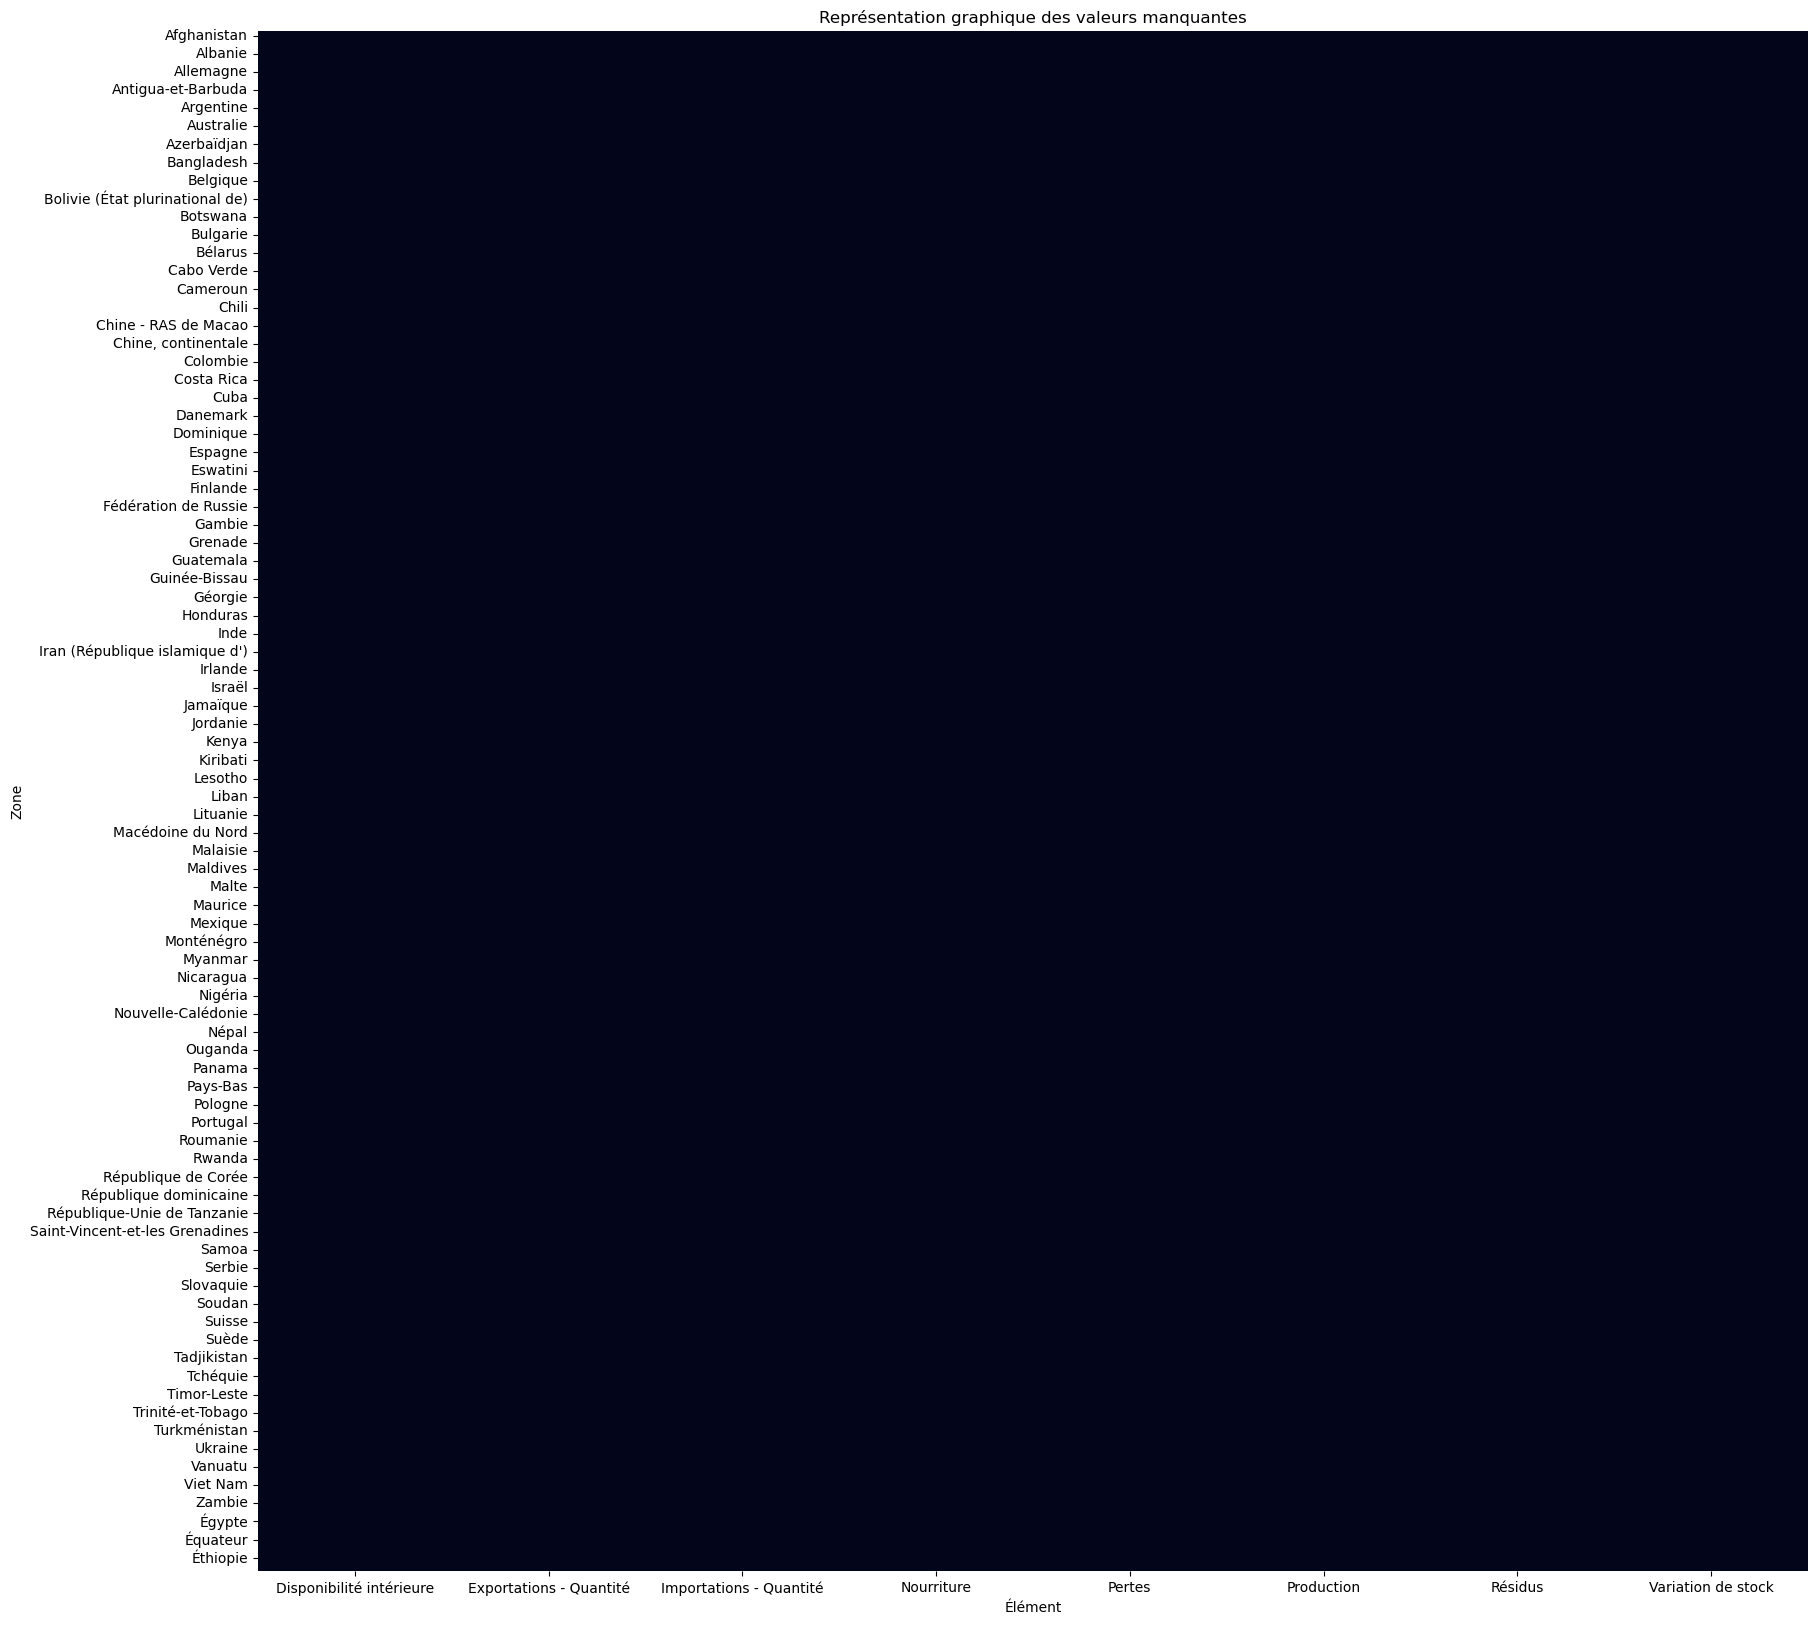

,observations,variables,moyennes,medianes,ecart_types,min,max,nb_valeurs_manquantes,%_valeurs_manquantes
Élément,,,,,,,,,
Disponibilité intérieure,170,8,687.594118,100.0,2187.184747,2.0,18266.0,0,0.0
Exportations - Quantité,170,8,104.970588,0.0,460.628724,0.0,4223.0,0,0.0
Importations - Quantité,170,8,89.529412,16.0,186.669983,0.0,1069.0,0,0.0
Nourriture,170,8,657.047059,99.5,2136.545796,2.0,18100.0,0,0.0
Pertes,170,8,17.176471,0.0,78.466014,0.0,695.0,0,0.0
Production,170,8,716.658824,68.0,2487.847959,0.0,21914.0,0,0.0
Résidus,170,8,-2.735294,0.0,13.346783,-125.0,0.0,0,0.0
Variation de stock,170,8,13.588235,-0.0,75.148893,-119.0,859.0,0,0.0


In [46]:
my_first_analyse(volaille)

In [47]:
def calculer_correlation(df, variable_1, variable_2):
    """
    Calcule la corrélation entre deux variables.
    Args:
        df (pandas.DataFrame): DataFrame contenant les données.
        variable_1 (str): Nom de la première variable.
        variable_2 (str): Nom de la deuxième variable.
    Returns:
        float: Coefficient de corrélation entre les deux variables.
    """
    correlation = df[variable_1].corr(df[variable_2])
    return correlation

In [48]:
calculer_correlation(df, "Nourriture", "Production")

0.9893481194734667

In [49]:
def visualiser_relation(df, variable_1, variable_2):
    """
    Visualise la relation entre deux variables à l'aide d'un graphique de dispersion.
    Args:
        df (pandas.DataFrame): DataFrame contenant les données.
        variable_1 (str): Nom de la première variable.
        variable_2 (str): Nom de la deuxième variable.
    """
    sns.scatterplot(data=df, x=variable_1, y=variable_2)
    plt.show()

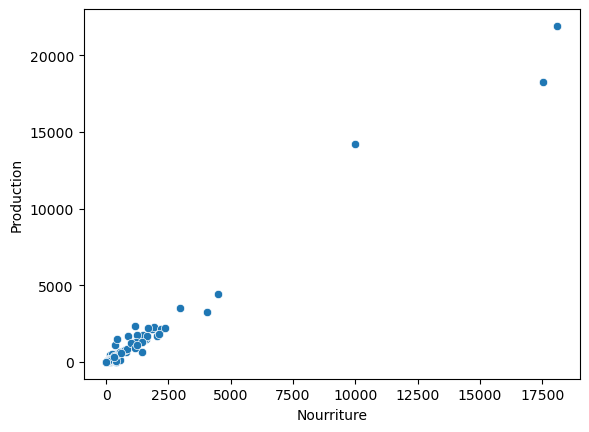

In [50]:
visualiser_relation(df, "Nourriture", "Production")

In [51]:
def visualiser_relation_par_groupe(df, variable_groupe, variable_1, variable_2):
    """
    Divise les données en groupes en fonction de la variable_groupe et visualise la relation entre les variables_1 et variable_2 dans chaque groupe à l'aide d'un graphique de dispersion.
    Args:
        df (pandas.DataFrame): DataFrame contenant les données.
        variable_groupe (str): Nom de la variable à utiliser pour diviser les données en groupes.
        variable_1 (str): Nom de la première variable.
        variable_2 (str): Nom de la deuxième variable.
    """
    sns.scatterplot(data=df, x=variable_1, y=variable_2, hue=variable_groupe)
    plt.show()

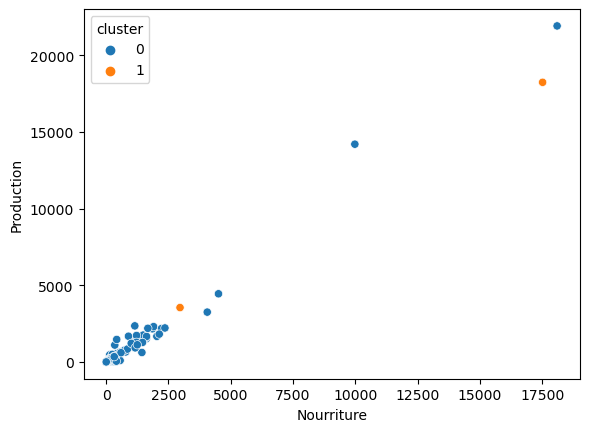

In [52]:
visualiser_relation_par_groupe(df, "cluster", "Nourriture", "Production")

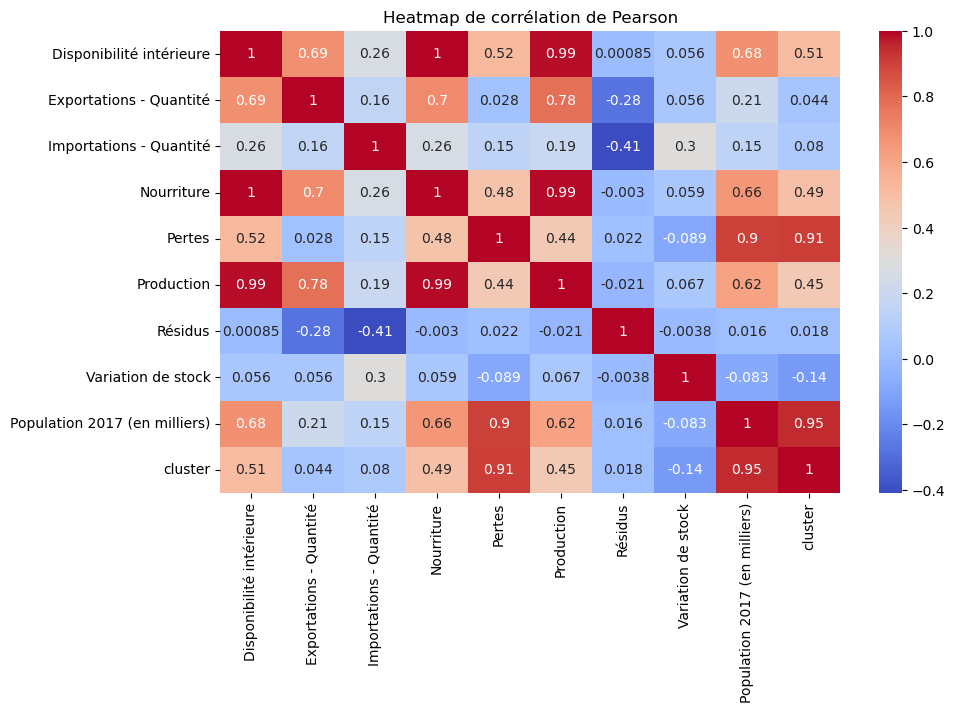

In [53]:
my_corr_heatmap(df)